In [1]:
import pandas as pd

In [2]:
titanic_data = pd.read_csv('./data/titanic_data/train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
unwanted_features = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket','Cabin', 'Embarked']
titanic_data = titanic_data.drop(unwanted_features, axis=1)
titanic_data.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [5]:
titanic_data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
Fare        float64
dtype: object

In [6]:
from sklearn import preprocessing

In [7]:
le = preprocessing.LabelEncoder()
titanic_data.Sex = le.fit_transform(titanic_data['Sex'])

In [8]:
titanic_data.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [9]:
print(titanic_data.shape)
titanic_data = titanic_data.dropna()
print(titanic_data.shape)

(891, 5)
(714, 5)


In [10]:
features = ['Pclass', 'Sex', 'Age', 'Fare']
titanic_features =  titanic_data[features]
titanic_features.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500


In [11]:
titanic_target = titanic_data[['Survived']]
titanic_target.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(titanic_features, titanic_target, test_size = 0.2, random_state=0)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((571, 4), (571, 1), (143, 4), (143, 1))

In [14]:
import torch

In [15]:
x_train_T_ = torch.from_numpy(x_train.values).float()
x_test_T_ = torch.from_numpy(x_test.values).float()
y_train_T_ =  torch.from_numpy(y_train.values).float()
y_test_T_ = torch.from_numpy(y_test.values).float()
x_train_T_.shape , x_test_T_.shape, y_train_T_.shape ,y_test_T_.shape

(torch.Size([571, 4]),
 torch.Size([143, 4]),
 torch.Size([571, 1]),
 torch.Size([143, 1]))

In [16]:
y_train_T_ = y_train_T_.view(1,-1)[0]
y_train_T_.shape

torch.Size([571])

In [17]:
y_test_T_ = y_test_T_.view(1,-1)[0]
y_test_T_.shape

torch.Size([143])

In [18]:
import torch.nn as nn

In [19]:
imp = 4
hid = 10
out = 2


In [20]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.l12 = nn.Linear(imp,hid)
        self.l23 = nn.Linear(hid,hid)
        self.l34 = nn.Linear(hid,out)
        
    def forward(self, x):
        x = torch.sigmoid(self.l12(x))
        x = torch.sigmoid(self.l23(x))
        x = self.l34(x)
        
        return torch.log_softmax(x, dim = -1)

In [21]:
model = Net()

In [22]:
import torch.optim as optim

In [23]:
#optimizer sluzi da updetamo gradijente ??
#pytorch.optimizer -> bitn funkcija optimizer.step 
#Adam.optim -> dolazi iz klase Momentum based optimisera
#definiramo momentum vektor momentum_vec(t) = gama*momentum_vec(t-1) + learning_rate * gradijent
#hiperparametar gama biramo blizu jedan
#parametri(t+1) = parametri(t) - momentum_vec(t)
#prije smo updatali kao parametri(t+1) = parametri(t) - learning_rate * gradijent
#dakle to jedan modificirani gradijentni spust -> teorija garantira bolju brzinu

optimizer = optim.Adam(model.parameters())

In [24]:
loss_fn = nn.NLLLoss()

In [25]:
iter_data = []
iterations = 2001

In [26]:
y_train_T_ = y_train_T_.type(torch.long)
y_test_T_ = y_test_T_.type(torch.long)

In [27]:
for iter in range (1, iterations):
    optimizer.zero_grad()
    Ypred_T = model(x_train_T_)
    
    loss = loss_fn(Ypred_T, y_train_T_)
    loss.backward()
    optimizer.step()
    
    Ypred_test_T = model(x_test_T_)
    loss_test = loss_fn(Ypred_test_T, y_test_T_) #lost_fn na testnim podacima
    
    #Ypred_test_T tenzor dim nesto*2
    _, pred = Ypred_test_T.data.max(1) #maks po stupcima danog retka
    Accuracy = pred.eq(y_test_T_).sum().item()/ y_test_T_.numpy().size #tenzor jednacenja dva tenzora .sum()
    TP = (pred & y_test_T_).sum().item() #ako imamo tenzor s jednim elementom cupamo broj s item
    FN = ((1-pred) & y_test_T_).sum().item()
    FP = (pred & (1- y_test_T_)).sum().item()
    Precision = TP/(TP+FP) if TP+FP != 0 else 0
    Recall = TP/(TP+FN) if TP+FN != 0 else 0
    
    iter_data.append((iter, loss.data.item(), loss_test.data.item(), Accuracy, Precision, Recall))
    if iter % 500 == 0:
        print('iteracija: ', iter)
        print("Train loss: ", loss.item())
        print("test loss: ", loss_test.item())
        print("Accuracy: ", Accuracy)
        print("Precision: ", Precision)
        print("Recall: ", Recall)
       
        
    

iteracija:  500
Train loss:  0.5590021014213562
test loss:  0.560707151889801
Accuracy:  0.6783216783216783
Precision:  0.6607142857142857
Recall:  0.578125
iteracija:  1000
Train loss:  0.4239807426929474
test loss:  0.4210572838783264
Accuracy:  0.8251748251748252
Precision:  0.8679245283018868
Recall:  0.71875
iteracija:  1500
Train loss:  0.39657896757125854
test loss:  0.430759072303772
Accuracy:  0.8181818181818182
Precision:  0.88
Recall:  0.6875
iteracija:  2000
Train loss:  0.39012545347213745
test loss:  0.43766292929649353
Accuracy:  0.8181818181818182
Precision:  0.88
Recall:  0.6875


In [28]:
Ypred_test_T.data.max(1)

(tensor([-0.3523, -0.0056, -0.0923, -0.0926, -0.6627, -0.0491, -0.0975, -0.3082,
         -0.2661, -0.4063, -0.1882, -0.6156, -0.3108, -0.0491, -0.1657, -0.0920,
         -0.0986, -0.4207, -0.3057, -0.0866, -0.2003, -0.0775, -0.1246, -0.1623,
         -0.1452, -0.4207, -0.0239, -0.0903, -0.5755, -0.4778, -0.1298, -0.5611,
         -0.1891, -0.0062, -0.1044, -0.0625, -0.0062, -0.5074, -0.1975, -0.4142,
         -0.1762, -0.1930, -0.4920, -0.4881, -0.1598, -0.3232, -0.5427, -0.0880,
         -0.1188, -0.0581, -0.1792, -0.0822, -0.1197, -0.0075, -0.1268, -0.5912,
         -0.0885, -0.1760, -0.0382, -0.4855, -0.3724, -0.0444, -0.1116, -0.1867,
         -0.0115, -0.4613, -0.0282, -0.0920, -0.0076, -0.5362, -0.1913, -0.3664,
         -0.0851, -0.0073, -0.0194, -0.4465, -0.5917, -0.2018, -0.1524, -0.1289,
         -0.1171, -0.4037, -0.4107, -0.0989, -0.0073, -0.1783, -0.0554, -0.3110,
         -0.0345, -0.0494, -0.0068, -0.1858, -0.4966, -0.2087, -0.0061, -0.4766,
         -0.0101, -0.3634, -

In [29]:
import matplotlib.pyplot as plt

In [30]:
df_iter_data = pd.DataFrame(iter_data, columns = ['iter', 'train_loss', 'test_loss', 'accuracy', 'precision', 'recall'])
df_iter_data.head()

,iter,train_loss,test_loss,accuracy,precision,recall
0,1,0.718360,0.705897,0.447552,0.447552,1.0
1,2,0.716049,0.704411,0.447552,0.447552,1.0
2,3,0.713795,0.702976,0.447552,0.447552,1.0
3,4,0.711600,0.701592,0.447552,0.447552,1.0
4,5,0.709462,0.700257,0.447552,0.447552,1.0


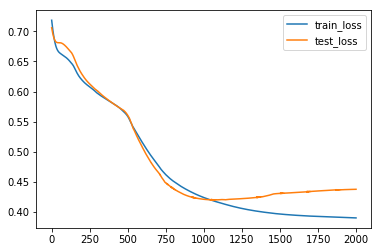

In [31]:
plt.plot(df_iter_data['train_loss'], label = 'train_loss')
plt.plot(df_iter_data['test_loss'], label  = 'test_loss')
plt.legend()
plt.show()

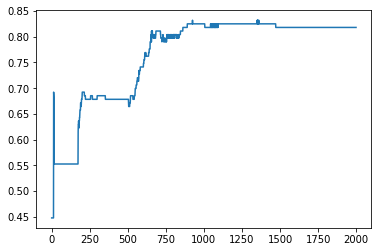

In [32]:
plt.plot(df_iter_data['accuracy'])
plt.show()

## vidimo da je s ovom arhitekturom i s ovim hiperparametrima nema smisla gledati vise od ~ 800 iteracija

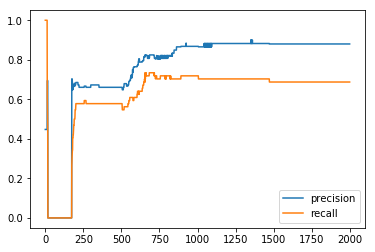

In [33]:
plt.plot(df_iter_data['precision'], label  = 'precision')
plt.plot(df_iter_data['recall'], label = 'recall')
plt.legend()
plt.show()